In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
data = pd.read_csv('train.csv')

In [122]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

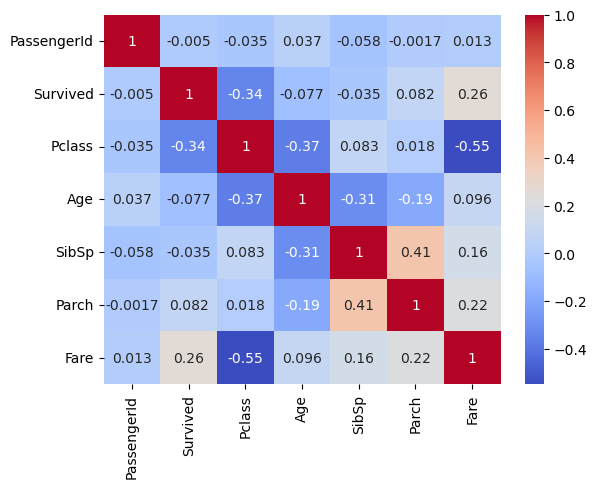

In [124]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [125]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices,test_indices in split.split(data, data[['Survived','Pclass',"Sex"]]):
    train_data = data.loc[train_indices]
    test_data = data.loc[test_indices]

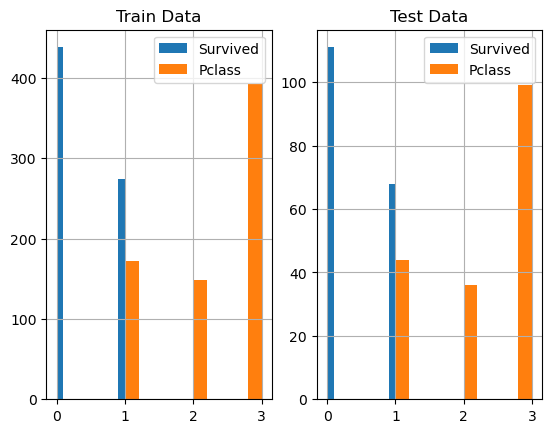

In [126]:
plt.subplot(1,2,1)
plt.title('Train Data')
train_data['Survived'].hist(label='Survived')
train_data['Pclass'].hist(label='Pclass')
plt.legend()

plt.subplot(1,2,2)
plt.title('Test Data')
test_data['Survived'].hist(label='Survived')
test_data['Pclass'].hist(label='Pclass')
plt.legend()

plt.show()

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        imputer = SimpleImputer(strategy='mean')
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [129]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        col_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[col_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        col_names = ["Male","Female"]
        
        for i in range(len(matrix.T)):
            X[col_names[i]] = matrix.T[i]            
            
        return X

In [130]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [131]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('ageimputer',AgeImputer()),
                     ('featureencoder',FeatureEncoder()),
                     ('featuredropper',FeatureDropper())])

In [132]:
train_data = pipeline.fit_transform(train_data)

In [133]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
450,451,0,2,36.000000,1,2,27.7500,0.0,0.0,1.0,0.0,1.0
799,800,0,3,30.000000,1,1,24.1500,0.0,0.0,1.0,1.0,0.0
776,777,0,3,29.802144,0,0,7.7500,0.0,1.0,0.0,0.0,1.0
13,14,0,3,39.000000,1,5,31.2750,0.0,0.0,1.0,0.0,1.0
862,863,1,1,48.000000,0,0,25.9292,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
414,415,1,3,44.000000,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
784,785,0,3,25.000000,0,0,7.0500,0.0,0.0,1.0,0.0,1.0
85,86,1,3,33.000000,3,0,15.8500,0.0,0.0,1.0,1.0,0.0
138,139,0,3,16.000000,0,0,9.2167,0.0,0.0,1.0,0.0,1.0


In [134]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 450 to 287
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [135]:
X_train = train_data.drop(['Survived'],axis=1)
y_train = train_data['Survived'].to_numpy()

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [137]:
X_train

array([[ 0.02103604, -0.37019624,  0.47472294, ...,  0.62282761,
        -0.73561236,  0.73561236],
       [ 1.37875091,  0.82789342,  0.01515471, ...,  0.62282761,
         1.35941164, -1.35941164],
       [ 1.289274  ,  0.82789342,  0.        , ..., -1.60558072,
        -0.73561236,  0.73561236],
       ...,
       [-1.39892365,  0.82789342,  0.24493883, ...,  0.62282761,
         1.35941164, -1.35941164],
       [-1.19273772,  0.82789342, -1.05717115, ...,  0.62282761,
        -0.73561236,  0.73561236],
       [-0.61308295,  0.82789342, -0.59760292, ...,  0.62282761,
        -0.73561236,  0.73561236]])

In [138]:
y_train

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [139]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0,max_depth=5,n_estimators=500)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=0)

In [140]:
test_data = pipeline.fit_transform(test_data)

In [141]:
test_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
178,179,0,2,30.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
77,78,0,3,29.294828,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
427,428,1,2,19.000000,0,0,26.0000,0.0,0.0,1.0,1.0,0.0
618,619,1,2,4.000000,2,1,39.0000,0.0,0.0,1.0,1.0,0.0
34,35,0,1,28.000000,1,0,82.1708,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,0,3,29.294828,0,0,7.7375,0.0,1.0,0.0,0.0,1.0
811,812,0,3,39.000000,0,0,24.1500,0.0,0.0,1.0,0.0,1.0
780,781,1,3,13.000000,0,0,7.2292,1.0,0.0,0.0,1.0,0.0
73,74,0,3,26.000000,1,0,14.4542,1.0,0.0,0.0,0.0,1.0


In [143]:
X_test = test_data.drop(['Survived'],axis=1)
y_test = test_data['Survived'].to_numpy()

X_test = scaler.transform(X_test)

In [164]:
from sklearn.metrics import confusion_matrix

print('Test Set Predictions')
print("Accuracy Score:",clf.score(X_test,y_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test,clf.predict(X_test)))

Test Set Predictions
Accuracy Score: 0.8212290502793296
Confusion Matrix:
[[103   8]
 [ 24  44]]


In [110]:
clf.predict(scaler.transform([[271,1,30,0,0,31,0,0,1,0,1]]))

C:\Users\Awais Tanveer Khan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [145]:
final_data = pipeline.fit_transform(data)

In [146]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [147]:
X_final = final_data.drop(['Survived'],axis=1)
y_final = final_data['Survived'].to_numpy()

X_final = scaler.transform(X_final)

In [148]:
prod_clf = RandomForestClassifier(random_state=0,max_depth=5,n_estimators=500)
prod_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=0)

In [165]:
print("Complete DataSet Predictions")
print("Accuracy Score:",prod_clf.score(X_final,y_final))
print('Confusion Matrix:')
print(confusion_matrix(y_final,clf.predict(X_final)))

Complete DataSet Predictions
Accuracy Score: 0.8518518518518519
Confusion Matrix:
[[508  41]
 [ 91 251]]
